## About this notebook
This notebook has the experients done in **Uncovering differential equations from data with hidden variables** when all the variables are observed. We analyze the Lorenz Attractor system. 

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import warnings

In [2]:
notebooks_dir = get_ipython().starting_dir
sys.path.append(os.path.join(notebooks_dir, '..', '.'))

In [3]:
from src.scripts.ode.fit_odefind import fit_and_save_coeffs
from src.scripts.ode.mse_time_comparison import compare_coeffs, plot_mse_time
from src.scripts.config import data_path, results_path


## Parameters
In order to reproduce the publication experiments, the number of steps needs to be set in 10240 (it takes arround 60hs to run). Here, we set the number of steps in 40.

In [4]:
system = 'LorenzAttractor'
obs_vars = ['x', 'y', 'z']
targets = [1]
maxpolys = [2]
var_name = 'X'
d = 1
gpomo_steps = 40

## Fit L-ODEfind model

In [ ]:
%%time
fit_and_save_coeffs(model=model, out=system, targets=targets, maxpolys=maxpolys, obs_vars=obs_vars, testsize=200)


## Fit GPoMo model

In [ ]:
d_path = str(data_path.resolve()) + f'/{system}/'
r_path = str(results_path.resolve()) + f"/{system}_{'_'.join(obs_vars)}/"

In [ ]:
%%time
%cd ..
%cd r_scripts
! Rscript gpomo_all_var_observed.R $d_path $r_path $gpomo_steps

## Compare GPoMo vs L-ODEfind MSE

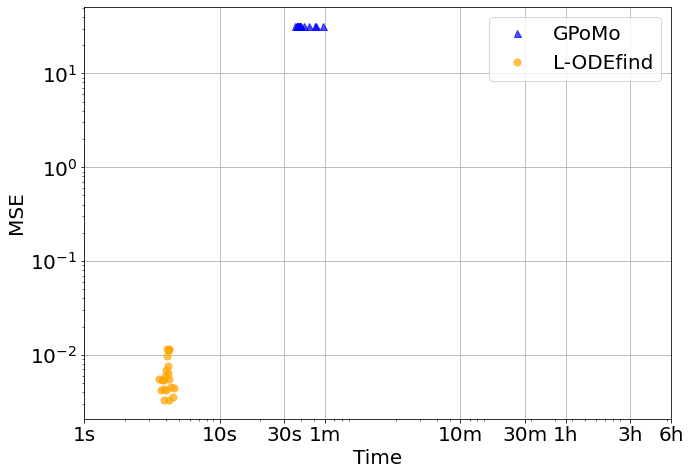

In [5]:
system_results = system +'_'+ '_'.join(obs_vars)
df_mse_odefind, coeffs_odefind = compare_coeffs(original_data=system , 
                                                results_folder= system_results+'_Odefind',
                                                var_name=var_name,
                                                d=d)

df_mse_gpomo, coeffs_gpomo = compare_coeffs(original_data=system,
                                            results_folder=system_results,
                                            var_name=var_name,
                                            d=d)


plot_mse_time(pd.concat([df_mse_gpomo, df_mse_odefind]), system_results)